In [1]:
from dlcliche.notebook import *
from dlcliche.torch_utils import *

In [2]:
import os
import argparse
import torch
from torch.utils.tensorboard import SummaryWriter
from torchvision import models, datasets
import numpy as np
from collections import defaultdict

from modules import BYOL
from modules.transformations import TransformsSimCLR

args = EasyDict({
    'dataset_dir': '/tmp/cifar10',
    'image_size': 224,
    'batch_size': 2,
})

torch.manual_seed(0)

# dataset
train_dataset = datasets.CIFAR10(
    args.dataset_dir,
    download=True,
    transform=TransformsSimCLR(size=args.image_size), # paper 224
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=args.batch_size,
    drop_last=True,
    pin_memory=True,
)

Files already downloaded and verified


Files already downloaded and verified


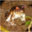

In [47]:
ds0 = datasets.CIFAR10(
    args.dataset_dir,
    download=True,
    transform=None
)
ds0[0][0]

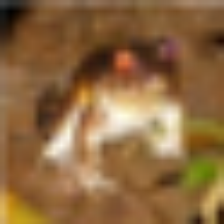

In [54]:
from warnings import simplefilter; simplefilter('ignore')
from torchvision import transforms as tfms
cr = tfms.RandomSizedCrop(224)
cr(ds0[0][0])

In [20]:
(Xi, Xj), y = next(iter(train_loader))

# x_i, x_j
Xi[0].shape, Xj[1].shape

(torch.Size([3, 224, 224]), torch.Size([3, 224, 224]))

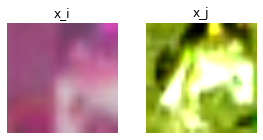

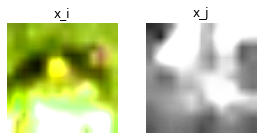

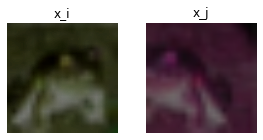

In [45]:
def _imshow(x, title):
    plt.imshow(x.numpy().transpose(1, 2, 0))
    plt.axis('off')
    plt.title(title)


for _ in range(3):
    (Xi, Xj), y = next(iter(train_loader))
    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1); _imshow(Xi[0], 'x_i')
    plt.subplot(1, 2, 2); _imshow(Xj[0], 'x_j')
    plt.tight_layout()
    plt.show()